In [126]:
# Import packages
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [127]:
BASE_DIR = Path().resolve()

first_path = BASE_DIR / "data" / "IHME-GBD_2023_DATA-92f2d5c6-1.csv"
df1 = pd.read_csv(first_path)

df1.head()

,population_group_id,population_group_name,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,All Population,5,Prevalence,62,Russian Federation,3,Both,22,All ages,558,Mental disorders,2,Percent,2010,0.118898,0.129917,0.108366
1,1,All Population,5,Prevalence,7,Democratic People's Republic of Korea,3,Both,22,All ages,558,Mental disorders,2,Percent,2010,0.103630,0.113115,0.094163
2,1,All Population,5,Prevalence,54,Slovakia,3,Both,22,All ages,558,Mental disorders,2,Percent,2010,0.120151,0.131727,0.108350
3,1,All Population,5,Prevalence,217,Sierra Leone,3,Both,22,All ages,558,Mental disorders,2,Percent,2010,0.118320,0.131824,0.103317
4,1,All Population,5,Prevalence,17,Sri Lanka,3,Both,22,All ages,558,Mental disorders,2,Percent,2010,0.090304,0.099874,0.081934


In [128]:
fig1 = df1.copy()

fig1 = (
    df1
    .assign(val_pct=lambda x: x["val"] * 100)
    .groupby("year", as_index=False)
    .agg(global_prevalence_pct=("val_pct", "mean"))
)

fig1.head()


,year,global_prevalence_pct
0,2010,12.307192
1,2011,12.352559
2,2012,12.409125
3,2013,12.473464
4,2014,12.546289


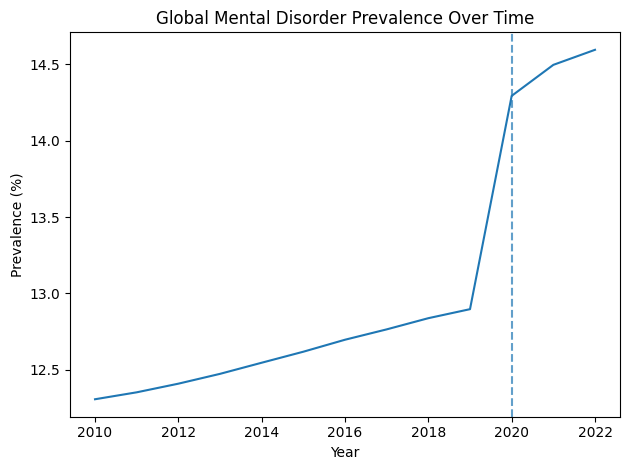

In [129]:
fig, ax = plt.subplots()

ax.plot(
    fig1["year"],
    fig1["global_prevalence_pct"]
)

ax.axvline(
    2020,
    linestyle="--",
    alpha=0.7
)

ax.set(
    title="Global Mental Disorder Prevalence Over Time",
    xlabel="Year",
    ylabel="Prevalence (%)"
)

plt.tight_layout()
plt.show()


In [130]:
# Read Macro Data
BASE_DIR = Path().resolve()

second_path = BASE_DIR / "data" / "changes-visitors-covid.csv"
df2 = pd.read_csv(second_path)

df2.head()

,Entity,Code,Day,Retail & Recreation,Grocery and pharmacy,Residential,Transit stations,Parks,Workplaces
0,Afghanistan,AFG,2020-02-17,0.00,4.000,1.333,5.667,1.000,-6.333
1,Afghanistan,AFG,2020-02-18,0.75,4.250,0.750,6.500,1.500,-3.250
2,Afghanistan,AFG,2020-02-19,0.40,4.000,0.800,5.200,1.400,-1.600
3,Afghanistan,AFG,2020-02-20,0.00,3.833,0.833,5.000,1.000,-0.333
4,Afghanistan,AFG,2020-02-21,0.00,4.571,0.714,5.286,1.429,0.571


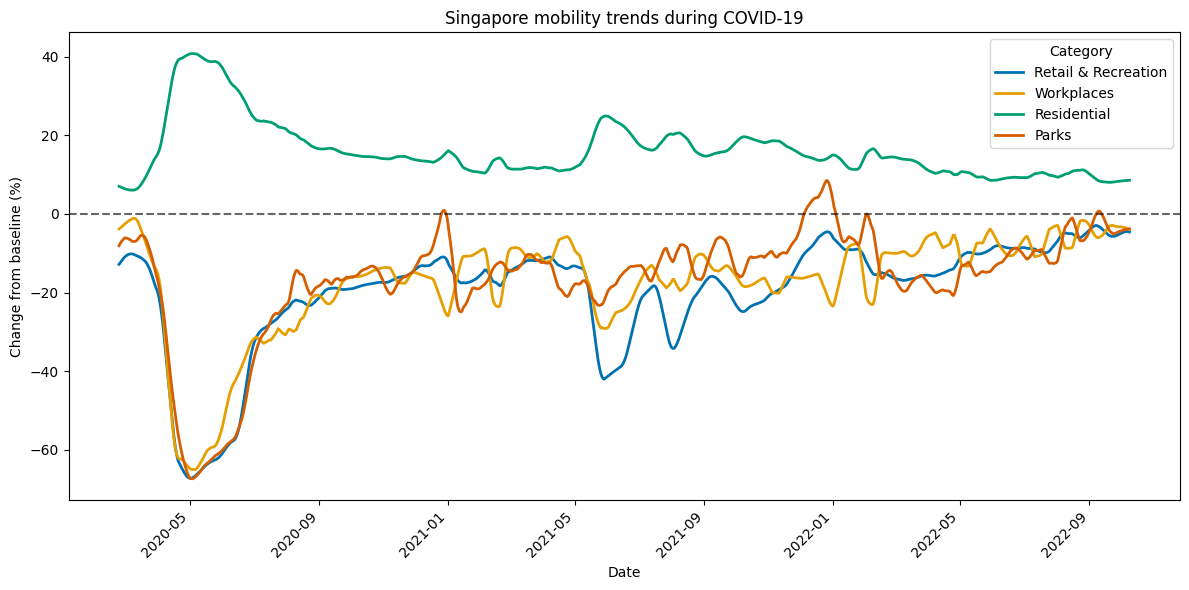

In [131]:
# Prep data
sg_mobility = (
    df2
    .assign(Day=pd.to_datetime(df2['Day']))
    .query("Entity == 'Singapore'")
    .sort_values('Day')
)

keep = ['Retail & Recreation', 'Workplaces', 'Residential', 'Parks']

fig2 = sg_mobility.copy()
fig2[keep] = fig2[keep].rolling(14, center=True).mean()

fig, ax = plt.subplots(figsize=(12, 6))

# Okabe–Ito color-blind friendly palette
colors = {
    'Retail & Recreation': '#0072B2',  # blue
    'Workplaces': '#E69F00',           # orange
    'Residential': '#009E73',          # green
    'Parks': '#D55E00'                 # vermillion
}

for cat in keep:
    ax.plot(
        fig2["Day"],
        fig2[cat],
        label=cat,
        color=colors[cat],
        linewidth=2
    )

ax.axhline(0, linestyle="--", color="black", alpha=0.6)

ax.set(
    title="Singapore mobility trends during COVID-19",
    xlabel="Date",
    ylabel="Change from baseline (%)"
)

ax.legend(title="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [132]:
BASE_DIR = Path().resolve()

final_path = BASE_DIR / "data" / "IHME-GBD_2023_DATA-e8aa7d75-1.csv"
df3 = pd.read_csv(final_path)

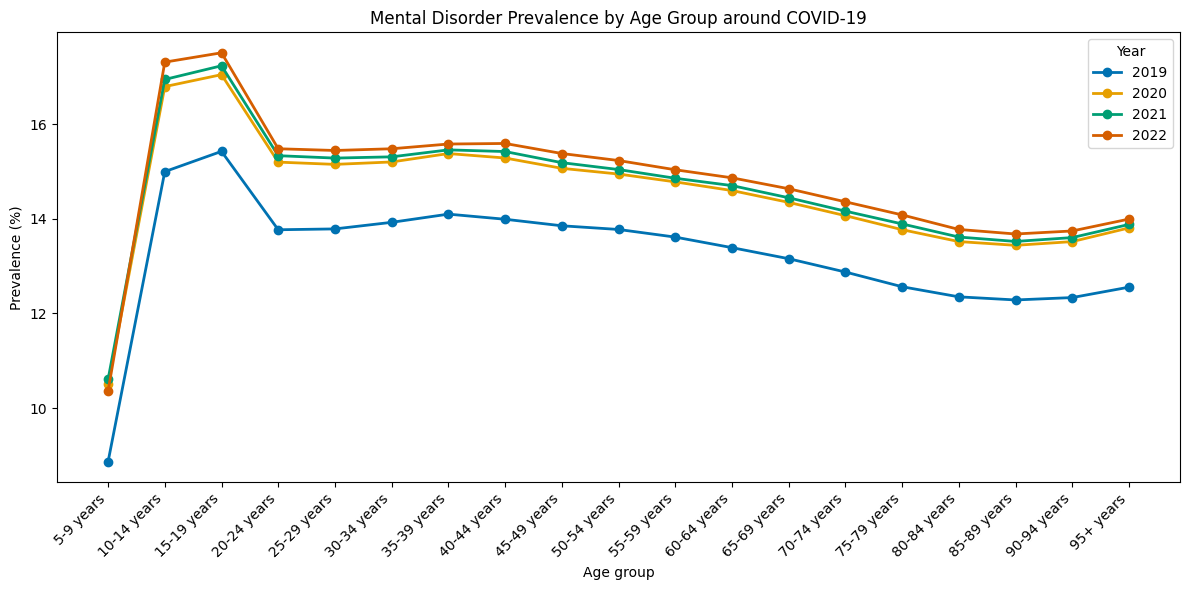

In [139]:
fig3 = df3[
    (df3["measure"] == "Prevalence") &
    (df3["location"] == "Global") &
    (df3["sex"] == "Both") &
    (df3["cause"] == "Mental disorders") &
    (df3["metric"] == "Percent") &
    (df3["year"].isin([2019, 2020, 2021, 2022]))
]

fig3 = (
    df3
    .assign(val_pct=lambda x: x["val"] * 100))

fig3 = fig3[fig3["age"].str.contains("years")]

fig3["age_start"] = fig3["age"].str.extract(r"(\d+)").astype(int)
fig3 = fig3.sort_values("age_start")

fig, ax = plt.subplots(figsize=(12, 6))

year_colors = {
    2019: "#0072B2",  # blue
    2020: "#E69F00",  # orange
    2021: "#009E73",  # green
    2022: "#D55E00"   # vermillion
}

for year in [2019, 2020, 2021, 2022]:
    subset = fig3[fig3["year"] == year]
    ax.plot(
        subset["age"],
        subset["val_pct"],
        marker="o",
        linewidth=2,
        color=year_colors[year],
        label=str(year)
    )

ax.set(
    title="Mental Disorder Prevalence by Age Group around COVID-19",
    xlabel="Age group",
    ylabel="Prevalence (%)"
)

plt.xticks(rotation=45, ha="right")
ax.legend(title="Year")
plt.tight_layout()
plt.show()
